In [1]:
import numpy as np
import healpy as hp
from astropy import units as u
from astropy import constants as c
import matplotlib
import matplotlib.pyplot as plt
import sys
from sklearn.neighbors import KernelDensity
sys.path.append('../')
from sources import DMsignal
from sources import smoothDM
from sources import MSP

In [2]:
file_path = '../../data/MSP/1407_5583.txt'
my_MSP = MSP.MSP(file_path)

In [3]:
channel = 'b'
DM_directory = '../../data/dm_spectra/'
my_DM_signal = DMsignal.DMsignal(DM_directory, channel)

In [12]:
energy_range = [2000, 100000] #this is in MeV
energy = np.linspace(energy_range[0], energy_range[1], 100000)
def norm(spectra, energy):
    return np.tile(np.sum(spectra*(energy[1]-energy[0]), axis = 1), (energy.size, 1)).T

#pulsars
num_spectra = 15
spectra = my_MSP.MSP_spectra(energy, num_spectra)
stacked = my_MSP.MSP_spectra(energy, 1, fixed_spectra = True, Ecut = 3780, alpha = -1.57)
GCE = my_MSP.MSP_spectra(energy, 1, fixed_spectra = True, Ecut = 2530, alpha = -0.945)
peak = my_MSP.MSP_spectra(energy, 1, fixed_spectra = True)
loaded_mean = my_MSP.MSP_spectra_load(energy, '../../data/MSP/mean_spectrum.npy', num_spectra = 1)
spectra = spectra/norm(spectra,energy)
stacked = stacked/norm(stacked,energy)
peak = peak/norm(peak,energy)
GCE = GCE/norm(GCE,energy)
loaded_mean = loaded_mean/norm(loaded_mean,energy)
prob1e = energy[np.searchsorted(np.cumsum(stacked*(energy[1]-energy[0])), 1 - 1/10000)]

#dark matter
DM_10000 = my_DM_signal.get_dNdE(energy, channel, 10000)
DM_10000_norm = np.sum(DM_10000*(energy[1]-energy[0]))
DM_30000 = my_DM_signal.get_dNdE(energy, channel, 30000)
DM_30000_norm = np.sum(DM_30000*(energy[1]-energy[0]))
DM_70000 = my_DM_signal.get_dNdE(energy, channel, 70000)
DM_70000_norm = np.sum(DM_70000*(energy[1]-energy[0]))
prob1eDM10 = energy[np.searchsorted(np.cumsum(DM_10000/DM_10000_norm*(energy[1]-energy[0])), 1 - 1/14000)]
prob1eDM30 = energy[np.searchsorted(np.cumsum(DM_30000/DM_30000_norm*(energy[1]-energy[0])), 1 - 1/22000)]
prob1eDM70 = energy[np.searchsorted(np.cumsum(DM_70000/DM_70000_norm*(energy[1]-energy[0])), 1 - 1/14000)]

energy_raw_10000, DM_raw_10000 = my_DM_signal.get_raw_data(channel, 10000)
energy_raw_30000, DM_raw_30000 = my_DM_signal.get_raw_data(channel, 30000)
energy_raw_70000, DM_raw_70000 = my_DM_signal.get_raw_data(channel, 70000)

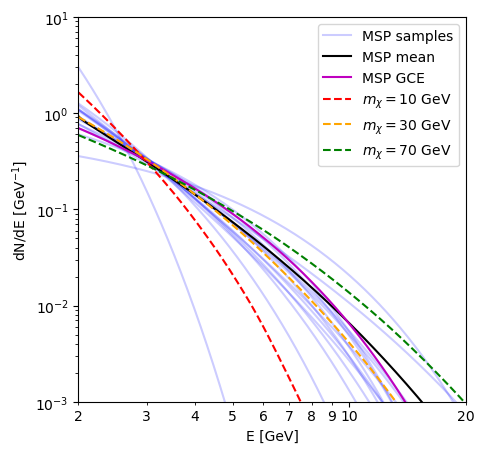

In [13]:
fig, ax = plt.subplots(figsize = (5,5))

for i in range(num_spectra):
    if i == 0:
        ax.plot(energy/1000, spectra[0,:]*1000, label = 'MSP samples', color = 'b', alpha = 0.2)
    else:
        i = i
        ax.plot(energy/1000, spectra[i,:]*1000, color = 'b', alpha = 0.2)

#ax.plot(energy/1000, stacked[0,:]*1000, label = 'MSP stacked', color = 'k')
#ax.plot(energy/1000, peak[0,:]*1000, label = 'MSP peak', color = 'r')
ax.plot(energy/1000, loaded_mean[0,:]*1000, label = 'MSP mean', color = 'k')
ax.plot(energy/1000, GCE[0,:]*1000, label = 'MSP GCE', color = 'm')
ax.plot(energy/1000, DM_10000/DM_10000_norm*1000, label = r'$m_{\chi} = 10$ GeV', linestyle = 'dashed', color = 'r')
ax.plot(energy/1000, DM_30000/DM_30000_norm*1000, label = r'$m_{\chi} = 30$ GeV', linestyle = 'dashed', color = 'orange')
ax.plot(energy/1000, DM_70000/DM_70000_norm*1000, label = r'$m_{\chi} = 70$ GeV', linestyle = 'dashed', color = 'g')
#ax.plot(energy_raw_10000[160:]/1000, DM_raw_10000[160:]/DM_10000_norm*1000, label = r'$m_{DM} = 10 GeV$ raw', marker = 'o', linestyle = 'none')
#ax.plot(energy_raw_30000[150:]/1000, DM_raw_30000[150:]/DM_30000_norm*1000, label = r'$m_{DM} = 30 GeV$ raw', marker = 'o', linestyle = 'none')
#ax.plot(energy_raw_70000[140:]/1000, DM_raw_70000[140:]/DM_70000_norm*1000, label = r'$m_{DM} = 70 GeV$ raw', marker = 'o', linestyle = 'none')
#ax.vlines(10, 1e-9, 1e-2, linestyles = 'dashed', color = 'k')
#ax.vlines(30, 1e-9, 1e-2, linestyles = 'dashed', color = 'k')
#ax.vlines(70, 1e-9, 1e-2, linestyles = 'dashed', color = 'k')
#ax.vlines(prob1e, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'k')
#ax.vlines(prob1eDM10, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'b')
#ax.vlines(prob1eDM30, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'orange')
#ax.vlines(prob1eDM70, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'g')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'E [GeV]')
ax.set_ylabel(r'dN/dE [GeV$^{-1}$]')
ax.set_ylim(1e-3, 10)
ax.set_xlim(2, 20)
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.f'))
ax.xaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%.f'))
ax.tick_params(axis='x', which='major', pad=2)
ax.legend()

In [14]:
#fig.savefig('../../gc_jobs/figures/spectra.pdf')

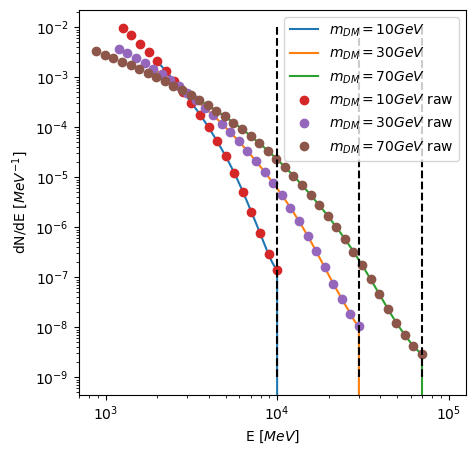

In [6]:
fig, ax = plt.subplots(figsize = (5,5))
'''
for i in range(100):
    if i == 0:
        ax.plot(energy, spectra[0,:], label = 'MSP rands', color = 'b')
    else:
        i = i
        ax.plot(energy, spectra[i,:], color = 'b')
'''
#ax.plot(energy, stacked[0,:], label = 'MSP stacked', color = 'k')
#ax.plot(energy, peak[0,:], label = 'MSP peak', color = 'r')
#ax.plot(energy, GCE[0,:], label = 'MSP GCE', color = 'm')
ax.plot(energy, DM_10000/DM_10000_norm, label = r'$m_{DM} = 10 GeV$')
ax.plot(energy, DM_30000/DM_30000_norm, label = r'$m_{DM} = 30 GeV$')
ax.plot(energy, DM_70000/DM_70000_norm, label = r'$m_{DM} = 70 GeV$')
ax.plot(energy_raw_10000[160:], DM_raw_10000[160:]/DM_10000_norm, label = r'$m_{DM} = 10 GeV$ raw', marker = 'o', linestyle = 'none')
ax.plot(energy_raw_30000[150:], DM_raw_30000[150:]/DM_30000_norm, label = r'$m_{DM} = 30 GeV$ raw', marker = 'o', linestyle = 'none')
ax.plot(energy_raw_70000[140:], DM_raw_70000[140:]/DM_70000_norm, label = r'$m_{DM} = 70 GeV$ raw', marker = 'o', linestyle = 'none')
ax.vlines(10000, 1e-9, 1e-2, linestyles = 'dashed', color = 'k')
ax.vlines(30000, 1e-9, 1e-2, linestyles = 'dashed', color = 'k')
ax.vlines(70000, 1e-9, 1e-2, linestyles = 'dashed', color = 'k')
#ax.vlines(prob1e, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'k')
#ax.vlines(prob1eDM10, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'b')
#ax.vlines(prob1eDM30, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'orange')
#ax.vlines(prob1eDM70, np.min(GCE), np.max(GCE), linestyles = 'dashed', color = 'g')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'E $[MeV]$')
ax.set_ylabel(r'dN/dE $[MeV^{-1}]$')
ax.legend()